In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [16]:
# MNIST 패션 데이터셋
from keras.datasets.fashion_mnist import load_data

In [17]:
# 데이터 확인

(X_train, y_train), (X_test, y_test) = load_data()
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


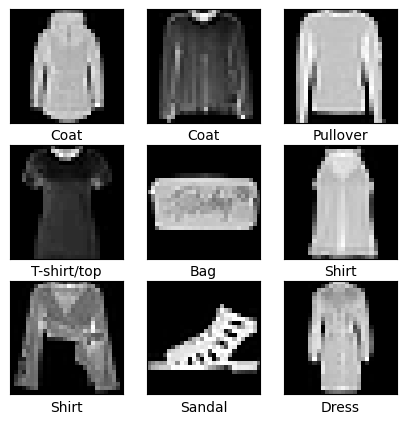

In [18]:
# 데이터 확인 - 구글링 코드

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker','Bag','Ankle boot']
sample_size = 9
random_idx = np.random.randint(60000, size=sample_size)

plt.figure(figsize=(5,5))
for i, idx in enumerate(random_idx):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train[idx], cmap='gray')
  plt.xlabel(class_names[y_train[idx]])
plt.show()

In [19]:
# 정규화 (0~1)
X_train = X_train / 255.0
X_test = X_test / 255.0

In [20]:
# DNN 모델 구성
# 은닉층 2개, 각 뉴런 개수는 256개, 128개
model_dnn = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
# 컴파일
# sparse_categorial_crossentropy의 경우 레이블을 원-핫 인코딩 하지 않아도 내부에서 자동으로 수행
model_dnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [22]:
# 학습
passion_dnn = model_dnn.fit(X_train, y_train, epochs=10,
                            validation_split=0.1, batch_size=128, verbose=2)

Epoch 1/10
422/422 - 6s - 13ms/step - accuracy: 0.7727 - loss: 0.6386 - val_accuracy: 0.8472 - val_loss: 0.4150
Epoch 2/10
422/422 - 4s - 10ms/step - accuracy: 0.8415 - loss: 0.4412 - val_accuracy: 0.8575 - val_loss: 0.3835
Epoch 3/10
422/422 - 3s - 8ms/step - accuracy: 0.8539 - loss: 0.3982 - val_accuracy: 0.8653 - val_loss: 0.3691
Epoch 4/10
422/422 - 4s - 10ms/step - accuracy: 0.8645 - loss: 0.3748 - val_accuracy: 0.8742 - val_loss: 0.3391
Epoch 5/10
422/422 - 3s - 8ms/step - accuracy: 0.8674 - loss: 0.3605 - val_accuracy: 0.8745 - val_loss: 0.3432
Epoch 6/10
422/422 - 3s - 8ms/step - accuracy: 0.8734 - loss: 0.3440 - val_accuracy: 0.8743 - val_loss: 0.3517
Epoch 7/10
422/422 - 4s - 10ms/step - accuracy: 0.8799 - loss: 0.3297 - val_accuracy: 0.8787 - val_loss: 0.3257
Epoch 8/10
422/422 - 3s - 8ms/step - accuracy: 0.8815 - loss: 0.3244 - val_accuracy: 0.8820 - val_loss: 0.3209
Epoch 9/10
422/422 - 3s - 8ms/step - accuracy: 0.8836 - loss: 0.3142 - val_accuracy: 0.8848 - val_loss: 0.31

In [23]:
# 평가
test_loss, test_acc = model_dnn.evaluate(X_test, y_test, verbose=2)
print(f"DNN Test Accuracy: {test_acc:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.8783 - loss: 0.3363
DNN Test Accuracy: 0.8783
